In [ ]:
import os
import xarray as xr

# === Paths ===
input_folder = r"Data\Climate Data\2. Tasmania\ET_tas"
output_folder = r"Data\Climate Data\3. Tasmania_Monthly\ET_tas_monthly"
os.makedirs(output_folder, exist_ok=True)

# === List .nc files ===
nc_files = [f for f in os.listdir(input_folder) if f.endswith(".nc")]

# === Process each file ===
for nc_file in nc_files:
    nc_path = os.path.join(input_folder, nc_file)
    print(f"\n📂 Processing: {nc_file}")

    try:
        # === Load daily dataset ===
        ds = xr.open_dataset(nc_path)

        # === Identify numeric variables only ===
        numeric_vars = [
            var for var in ds.data_vars
            if ds[var].dtype in ["float32", "float64", "int32", "int64"]
        ]

        # === Monthly average ===
        ds_monthly = ds[numeric_vars].resample(time="MS").mean()

        # === Keep only lat, lon, time ===
        for coord in list(ds_monthly.coords):
            if coord not in ["lat", "lon", "time"]:
                ds_monthly = ds_monthly.drop_vars(coord, errors="ignore")

        # === Build correct filename (remove .nc first) ===
        base_name = os.path.splitext(nc_file)[0]   # removes .nc
        output_filename = f"{base_name}_monthly.nc"

        # === Save ===
        output_path = os.path.join(output_folder, output_filename)
        ds_monthly.to_netcdf(output_path)

        print(f"✅ Saved monthly file: {output_path}")

    except Exception as e:
        print(f"❌ Failed for {nc_file}: {e}")



📂 Processing: 1991.min_temp_cropped.nc
✅ Saved monthly file: Data\Climate Data\3. Tasmania_Monthly\Temp_min_tas_monthly\1991.min_temp_cropped_monthly.nc

📂 Processing: 1992.min_temp_cropped.nc
✅ Saved monthly file: Data\Climate Data\3. Tasmania_Monthly\Temp_min_tas_monthly\1992.min_temp_cropped_monthly.nc

📂 Processing: 1993.min_temp_cropped.nc
✅ Saved monthly file: Data\Climate Data\3. Tasmania_Monthly\Temp_min_tas_monthly\1993.min_temp_cropped_monthly.nc

📂 Processing: 1994.min_temp_cropped.nc
✅ Saved monthly file: Data\Climate Data\3. Tasmania_Monthly\Temp_min_tas_monthly\1994.min_temp_cropped_monthly.nc

📂 Processing: 1995.min_temp_cropped.nc
✅ Saved monthly file: Data\Climate Data\3. Tasmania_Monthly\Temp_min_tas_monthly\1995.min_temp_cropped_monthly.nc

📂 Processing: 1996.min_temp_cropped.nc
✅ Saved monthly file: Data\Climate Data\3. Tasmania_Monthly\Temp_min_tas_monthly\1996.min_temp_cropped_monthly.nc

📂 Processing: 1997.min_temp_cropped.nc
✅ Saved monthly file: Data\Climate D

In [10]:
df = xr.open_dataset(r'C:\Users\u1171032\Desktop\Drought Propogation\Imlementation\Data\Climate Data\3. Tasmania_Monthly\Rainfall_tas_monthly\1991.monthly_rain_cropped_monthly.nc')
print(df)

<xarray.Dataset> Size: 743kB
Dimensions:       (time: 12, lat: 84, lon: 92)
Coordinates:
  * time          (time) datetime64[ns] 96B 1991-01-01 1991-02-01 ... 1991-12-01
  * lat           (lat) float64 672B -43.6 -43.55 -43.5 ... -39.55 -39.5 -39.45
  * lon           (lon) float64 736B 143.8 143.9 143.9 ... 148.3 148.3 148.4
Data variables:
    spatial_ref   (time) float64 96B ...
    monthly_rain  (time, lat, lon) float64 742kB ...
Attributes:
    department:               Department of Environment and Science
    department_short:         DES
    copyright:                Copyright - the State of Queensland Department ...
    site_url:                 http://www.longpaddock.qld.gov.au
    institution:              Queensland Government, Department of Environmen...
    raster_source:            Gridded surface was created by interpolating ob...
    raster_source_additions:  and other suppliers (see the SILO webpage for d...
    metadata_url:             http://qldspatial.information.q

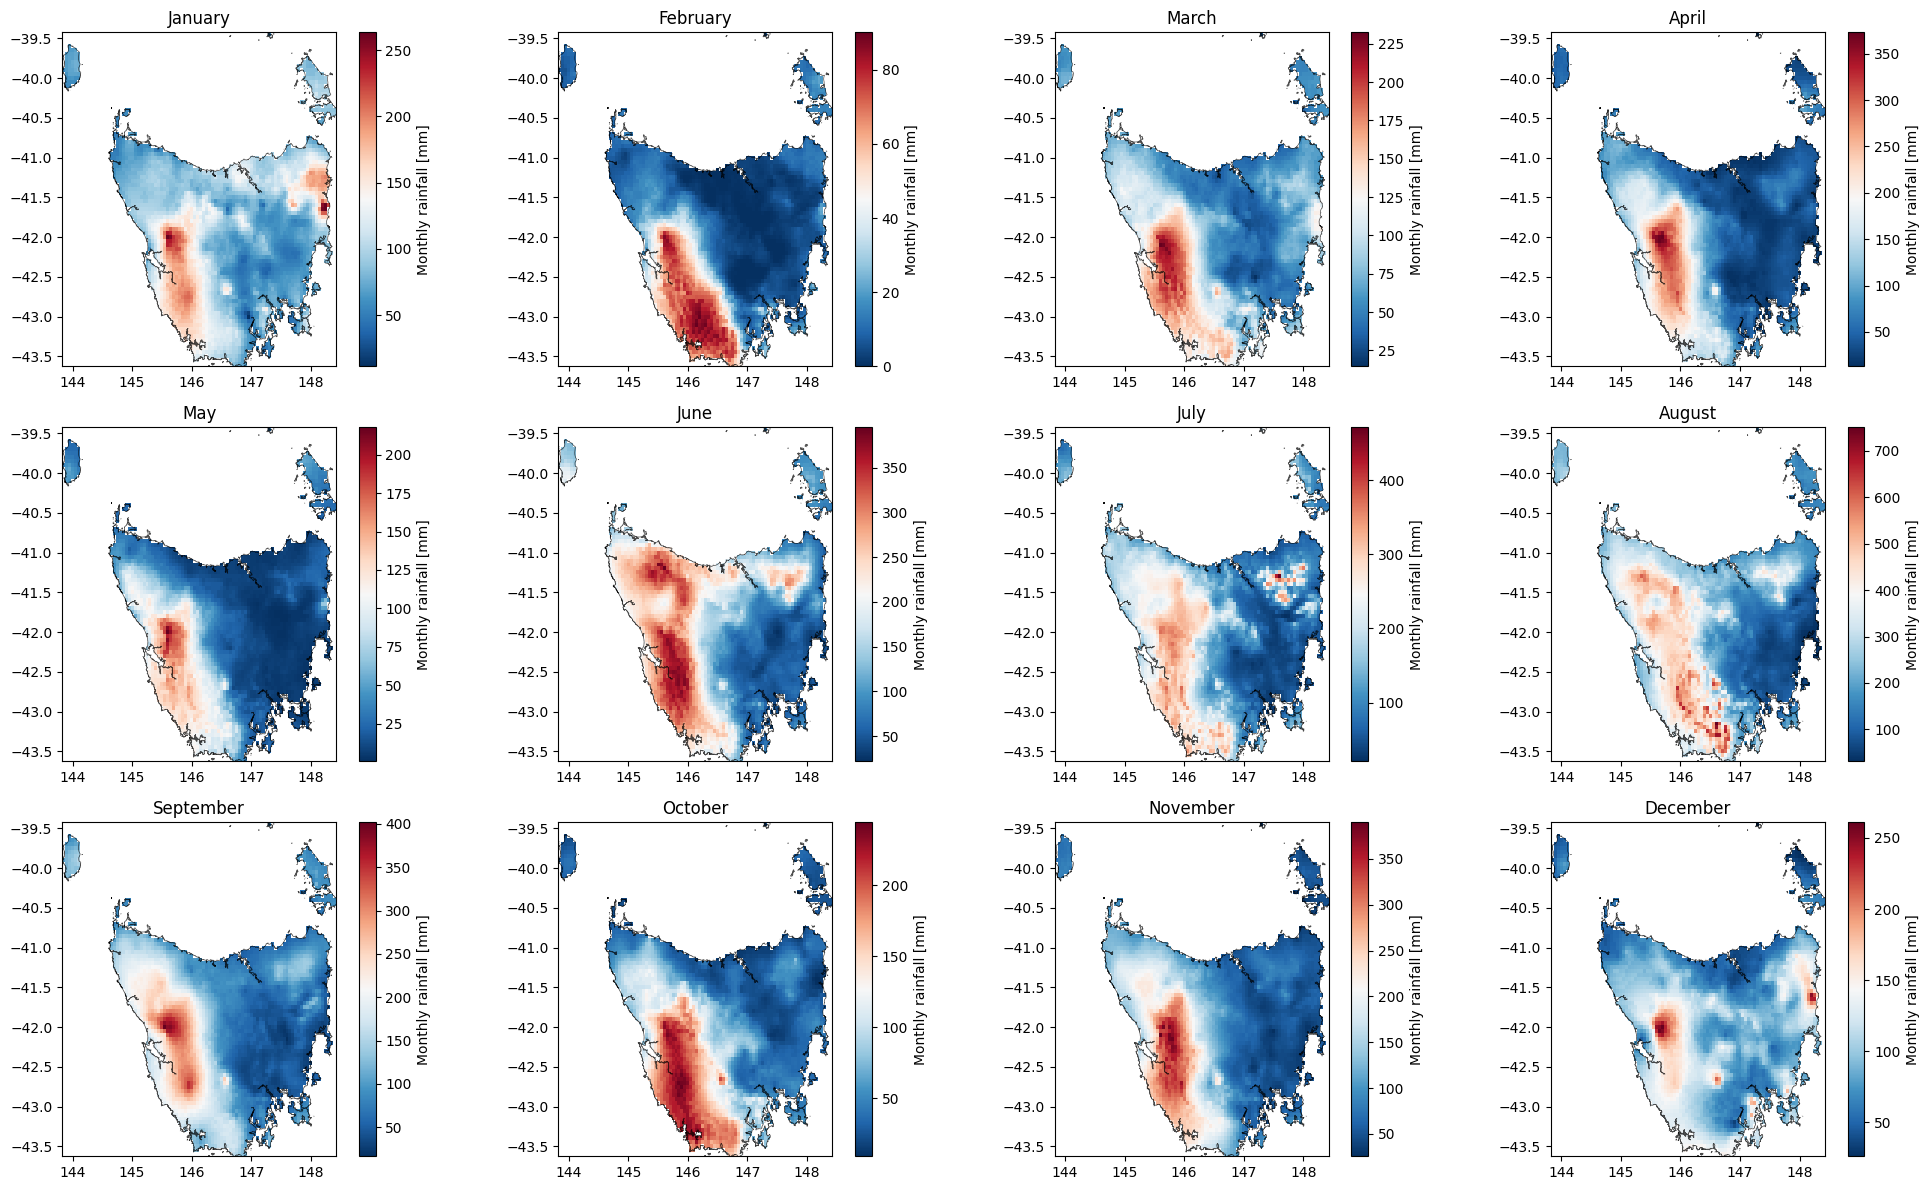

In [11]:
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd

# === Load the shapefile for Queensland regions ===
shapefile_path = r'Data\Tas_Shapefile\tasmania.shp'
qld_shape = gpd.read_file(shapefile_path).to_crs("EPSG:4326")

# === Open the monthly max temperature data for QLD ===
ds = xr.open_dataset(r'Data\Climate Data\3. Tasmania_Monthly\Rainfall_tas_monthly\1991.monthly_rain_cropped_monthly.nc')
monthly_rain = ds['monthly_rain']  # Adjust variable name as needed

# === Create figure and axes for the plot ===
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 12))
axes = axes.flatten()

# === Plot each month with its own colorbar ===
for i, month in enumerate(monthly_rain.time):
    ax = axes[i]
    data = monthly_rain.sel(time=month)
    
    # Plot with individual colorbar
    data.plot(ax=ax, cmap='RdBu_r', add_colorbar=True)
    
    # Overlay region boundaries
    qld_shape.boundary.plot(ax=ax, color='black', linewidth=0.5, alpha=0.7)
    
    # Set the title
    ax.set_title(month.dt.strftime('%B').item())
    ax.set_xlabel('')
    ax.set_ylabel('')

# === Remove unused axes if any ===
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# === Final layout ===
plt.tight_layout()
plt.show()
